In [1]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os
# import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from matplotlib.lines import Line2D
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
bdlc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/bangladesh_livechat_data.parquet')
brlc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/brasil_livechat_data.parquet')
idlc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/indonesia_livechat_data.parquet')
mllc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/malaysia_livechat_data.parquet')

pklc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/pakistan_livechat_data.parquet')
indlc = pd.read_parquet('/kaggle/input/esports-data/live_comments/india_livechat_data.parquet')
ind2lc = pd.read_parquet('/kaggle/input/esports-data/live_comments/indiav2_livechat_data.parquet')
trlc = pd.read_parquet('/kaggle/input/esports-data/live_comments/turkey_livechat_data.parquet')
vnlc = pd.read_parquet('/kaggle/input/esports-data/live_comments/vietnam_livechat_data.parquet')

In [4]:
inlc = pd.concat([indlc, ind2lc], ignore_index=True)

In [5]:
dfs_lc = ['bdlc', 'idlc', 'mllc', 'pklc', 'inlc', 'vnlc']
sm = 0
for df_name in dfs_lc:
    df = globals()[df_name]
    print(f"Length of {df_name}: {len(df)/1e6:.2f}M")
    sm+=len(df)

print(f'Total is {sm/1e6:.2f}M')
print(f'Total in crore {sm/1e7:.2f}Corer')

Length of bdlc: 2.80M
Length of idlc: 6.97M
Length of mllc: 3.25M
Length of pklc: 3.38M
Length of inlc: 9.13M
Length of vnlc: 1.41M
Total is 26.94M
Total in crore 2.69Corer


## Bangladesh

In [6]:
import emoji

def replace_emoji_codes(text):
    """
    Replace text-based emoji codes with actual emojis using the `emoji` library.

    Parameters:
    - text (str): The input text containing emoji codes.

    Returns:
    - str: The text with emoji codes replaced by actual emojis.
    """
    # Convert text-based emoji codes to actual emojis
    return emoji.emojize(text)

# Example usage
text = "A1 :red_heart: A1 :red_heart:"
converted_text = replace_emoji_codes(text)
print(converted_text)  # Output: "A1 ❤️ A1 ❤️"

import re

def count_words(text):
    # Remove punctuations using regular expression
    text_without_punctuations = re.sub(r'[^\w\s]', '', text)

    # Split the text into words based on whitespace characters
    words = text_without_punctuations.split()

    # Get the number of words
    word_length = len(words)

    return word_length


A1 ❤️ A1 ❤️


In [7]:
tqdm.pandas()

In [8]:
bdlc['message'] = bdlc.message.progress_apply(replace_emoji_codes)
bdlc['wordcount'] = bdlc.message.progress_apply(count_words)

bdlc = bdlc.sort_values(by='wordcount', ascending=False).reset_index(drop=True)

100%|██████████| 2796193/2796193 [00:18<00:00, 149899.02it/s]


In [9]:
bdlc.tail()

,datetime,author,message,video_id,wordcount
2796188,2022-09-24 12:30:05,A1esJOSiM🤣,🍎🍎🍎🍎🍎🍎,dezcACkIJzM,0
2796189,2022-09-24 12:30:09,A1esJOSiM🤣,🍎🍎🍎🍎🍎🍎🍎,dezcACkIJzM,0
2796190,2022-09-24 12:30:11,Abir Hossain,🥭🥭🥭🥭,dezcACkIJzM,0
2796191,2022-09-24 12:30:14,A1esJOSiM🤣,🍎🍎🍎🍎🍎,dezcACkIJzM,0
2796192,2021-08-13 12:37:07,mahfuz khan,,R0MZfE8eVx8,0


## Checkpoint for filter

In [10]:
filt = bdlc[:].copy()
filt.head(20)

,datetime,author,message,video_id,wordcount
0,2021-02-20 10:10:27,Rahman Rahat,巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴...,gsGw2Fgxrlk,66
1,2021-02-20 10:10:19,Rahman Rahat,巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴...,gsGw2Fgxrlk,66
2,2021-02-20 10:10:09,Rahman Rahat,巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴...,gsGw2Fgxrlk,66
3,2021-02-20 10:09:20,Rahman Rahat,巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴...,gsGw2Fgxrlk,66
4,2021-03-27 13:33:37,Tazriyan Ahnaf,A1 op A1 op A1 op A1 op A1 op A1 op A1 op A1 o...,4D5QvYnU3cs,66
5,2021-03-24 14:16:31,Tazriyan Ahnaf,A1 op A1 op A1 op A1 op A1 op A1 op A1 op A1 o...,NOPxITaEQ4Y,66
6,2021-03-27 13:45:46,Tazriyan Ahnaf,A1 op A1 op A1 op A1 op A1 op A1 op A1 op A1 o...,4D5QvYnU3cs,66
7,2021-02-20 10:10:53,Rahman Rahat,巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴...,gsGw2Fgxrlk,66
8,2021-02-20 10:09:22,Rahman Rahat,巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴...,gsGw2Fgxrlk,66
9,2021-02-20 10:12:26,Rahman Rahat,巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴尔 巴...,gsGw2Fgxrlk,66


In [11]:
filt = filt[filt['wordcount'] >= 2]

filt.tail()

,datetime,author,message,video_id,wordcount
1998558,2020-08-23 12:35:37,Taj Film,A1 op,uddWQDBPxdo,2
1998559,2022-05-22 13:51:20,TAHSAN GAMING YT,GG PT ♥️♥️♥️,sRJkeQa0UFQ,2
1998560,2021-07-17 15:09:03,ZeuS Gaming,A1 LOL 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂,5YCnTaXjuNU,2
1998561,2020-08-27 13:54:45,AXZCER,k eliminated?,6JssrtX6y3A,2
1998562,2020-08-22 13:21:41,ZAHID HASAN,INES??? koi?,NbWaP0iyeBE,2


In [12]:
print(bdlc.shape)
print(filt.shape)

(2796193, 5)
(1998563, 5)


In [13]:
# tqdm.pandas()
# filt['message'] = filt.message.progress_apply(replace_emoji_codes)
# filt.head(2)

In [14]:
filt.wordcount.describe()

count    1.998563e+06
mean     6.032043e+00
std      5.640954e+00
min      2.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      7.000000e+00
max      6.600000e+01
Name: wordcount, dtype: float64

In [15]:
filt['message'][61224]

'GUYZZZ GOPON SHUTRO THEKE JANA GESE JE A1ES SINISTER AKHON THEKE 7SEA GSM AR HOIA KHELBE SHOBAI TADER JONNO DOWA KORBEN💖💖💖💖💖💖💖💖🤲🙀🙀🙀💖💖💖💖💖💖💖💖💖💖💖💖💖'

In [16]:
import torch
print(torch.cuda.is_available())  # Should print True if GPU is available
print(torch.cuda.current_device())  # Prints the ID of the current device
print(torch.cuda.get_device_name(0))  # Prints the name of the GPU

True
0
Tesla T4


In [17]:
model_path = 'cardiffnlp/twitter-roberta-base-sentiment-latest'

In [18]:
from transformers import pipeline
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path, device=0)
sentiment_task("Covid cases are increasing fast!")

2024-08-16 05:24:34.972925: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 05:24:34.973045: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 05:24:35.237924: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

[{'label': 'negative', 'score': 0.7235766649246216}]

In [19]:
def make_pred(text):
    try:
        return sentiment_task(text)[0]['label']
    except:
        return 'neutral'
make_pred('i love you.')

'positive'

In [20]:
xt = filt['message'][61225]
make_pred(xt)

'positive'

In [21]:
filt['sentiment'] = filt.message.progress_apply(make_pred)

100%|██████████| 1998563/1998563 [6:26:26<00:00, 86.19it/s]


In [22]:
filt.sentiment.value_counts()

sentiment
neutral     1403359
positive     385306
negative     209898
Name: count, dtype: int64

In [23]:
filt.tail()

,datetime,author,message,video_id,wordcount,sentiment
1998558,2020-08-23 12:35:37,Taj Film,A1 op,uddWQDBPxdo,2,neutral
1998559,2022-05-22 13:51:20,TAHSAN GAMING YT,GG PT ♥️♥️♥️,sRJkeQa0UFQ,2,positive
1998560,2021-07-17 15:09:03,ZeuS Gaming,A1 LOL 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂,5YCnTaXjuNU,2,positive
1998561,2020-08-27 13:54:45,AXZCER,k eliminated?,6JssrtX6y3A,2,neutral
1998562,2020-08-22 13:21:41,ZAHID HASAN,INES??? koi?,NbWaP0iyeBE,2,neutral


In [24]:
# make_pred('বালের খেলা করো। ফালতু যতসব। ')

In [25]:
filt['datetime'] = pd.to_datetime(filt['datetime'])

# Extract the year and create a new column 'year'
filt['year'] = filt['datetime'].dt.year

In [26]:
filt.year.value_counts()

year
2021    981626
2020    482661
2022    365532
2023     92635
2024     73980
2019      2129
Name: count, dtype: int64

In [27]:
grouped = filt.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

In [28]:
grouped

sentiment,negative,neutral,positive
year,,,
2019,113,1635,381
2020,47574,369559,65528
2021,114164,650355,217107
2022,34325,253255,77952
2023,8119,69961,14555
2024,5603,58594,9783


In [29]:
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100
grouped_percentage

sentiment,negative,neutral,positive
year,,,
2019,5.307656,76.796618,17.895726
2020,9.856607,76.566990,13.576402
2021,11.630091,66.252829,22.117079
2022,9.390423,69.283948,21.325629
2023,8.764506,75.523290,15.712204
2024,7.573669,79.202487,13.223844


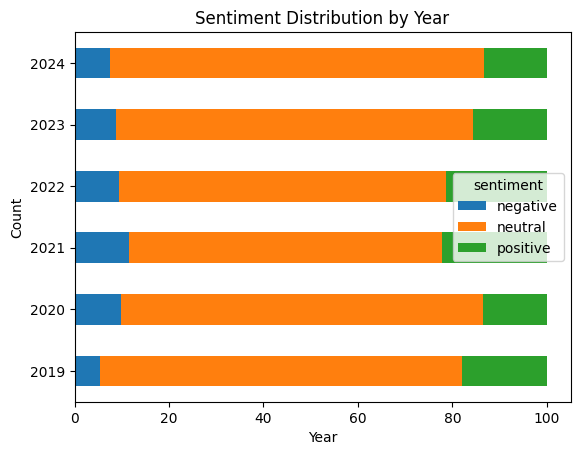

In [30]:
# Plotting the stacked bar chart
grouped_percentage.plot(kind='barh', stacked=True)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Year')

# Display the plot
plt.show()

In [31]:
# from transformers import pipeline
# from datasets import Dataset
# import pandas as pd

# # Example data
# data = {
#     'text': [
#         "Covid cases are increasing fast!",
#         "I am feeling great today!",
#         "This is a terrible situation.",
#         # Add more examples as needed
#     ]
# }
# df = pd.DataFrame(data)
# dataset = Dataset.from_pandas(df)

# # Load the sentiment analysis pipeline
# sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path, device=0)

# # Define the function to analyze sentiments
# def analyze_sentiments(batch):
#     results = sentiment_task(batch['text'])
#     return {'sentiment': [result['label'] for result in results],
#             'score': [result['score'] for result in results]}

# # Apply sentiment analysis to the dataset
# results_dataset = dataset.map(analyze_sentiments, batched=True)

# # Convert results to a DataFrame
# results_df = pd.DataFrame(results_dataset)

# # Print results
# print(results_df.head())
